In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
print('Are you using the model for the first time')
if input('y/n \n')=='y':
  print('donwloading the model')
  !wget https://www.kaggleusercontent.com/kf/40082680/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..E_XAUtjdDidxaML8Ct3SAg.X6vbQHK5QH7vnYLcyAGqMAEPr0cshww9Tsz_PlQ_xlKmUmcXHKD1TL1nS3cqyjp6s2-NDkIBBwko2LkoNtMwugZ8KG8UoqnRoqCBRbZ-seJBlRPu6aE6cIPMrmTjYAiRTQkfwCGm7Bb70uGdFse8DMBnDGyfQf285Hxhz9tcNdGCwfDNvf3bpxYgWiIIMTCffT0mZnHOq-5pEU5OhC5tdh8bQuuWGWUIgO9xcYvoYQNZdyeQh3-oi3F7LHZxl39pqjXZZLIP5aafs4tl-0mYCtbNGki6naV-sNSrDU4aRDjomqTcxKO4fHkJwlJYMrjGLuXnupa21NxAEyvbQmU5p2DABSAyWzuq_7yAdoLC4HozKcyZPlSWCmAS4_urG1EEZ0ao1FC9Ocms4jeGUDXDWOydqRoKPBMJHzn_S3fad07pinwTBvwj3tSUHEw7VWFYEyZR6Ffn6U4o6qMcSTMMweRuXDC0aNJg5u_3uzuqJsJdye2_NeGMX0bQ15zKtKK3Q6bZ1y4b4JVqO7yPtLJWBfyUBFFrQ1dWgmpkmlSRrFyXAqFBGmCBhYl-6yl0XVgRYrwbd0TptPc_8u6iROMUOxMWtkyNTWbFhxmxrVqkz4t5R1rFtZ61joTZ_8g_dx-in_yJTpCLqQfnwS-B9G6vIQ.2QRaAD9Er0LczqFQSDoaTg/ham_eff3_weights.hdf5
  print('saving model to drive')
  !cp /content/ham_eff3_weights.hdf5  /content/drive/My\ Drive/
else:
  print('load model from thie google drive') 
  !cp /content/drive/My\ Drive/ham_eff3_weights.hdf5 /content/

Are you using the model for the first time
y/n 
n
load model from thie google drive


In [3]:
%%capture
!pip install efficientnet

In [4]:
#download the dataset
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/zr7vgbcyr2-1.zip

--2020-08-04 06:31:16--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/zr7vgbcyr2-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.101.192
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.101.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3593344681 (3.3G) [application/octet-stream]
Saving to: ‘zr7vgbcyr2-1.zip’

zr7vgbcyr2-1.zip    100%[===================>]   3.35G  21.9MB/s    in 2m 41s  

2020-08-04 06:33:57 (21.3 MB/s) - ‘zr7vgbcyr2-1.zip’ saved [3593344681/3593344681]



In [5]:
#unzip the dataset
%%capture
!unzip zr7vgbcyr2-1.zip

In [6]:
#create a new folder named as data
!mkdir data

In [7]:
#unzip all subfolder
%%capture
!unzip /content/images/imgs_part_1.zip
!unzip /content/images/imgs_part_2.zip
!unzip /content/images/imgs_part_3.zip

In [8]:
#move all pictures from subfolder to main folder data
!mv  /content/imgs_part_1/* /content/data
!mv  /content/imgs_part_2/* /content/data
!mv  /content/imgs_part_3/* /content/data

In [9]:
#remove the folder that contain subfolders
!rm -r /content/images

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#read annotation file
df=pd.read_csv('/content/metadata.csv')
df.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARM,NaN,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FACE,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAND,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


In [11]:
#create a dataframe with image name and encoded labels
labels=pd.get_dummies(df['diagnostic'])
df=pd.concat([df['img_id'],labels],axis=1)
df.head()

,img_id,ACK,BCC,MEL,NEV,SCC,SEK
0,PAT_1516_1765_530.png,0,0,0,1,0,0
1,PAT_46_881_939.png,0,1,0,0,0,0
2,PAT_1545_1867_547.png,1,0,0,0,0,0
3,PAT_1989_4061_934.png,1,0,0,0,0,0
4,PAT_684_1302_588.png,0,1,0,0,0,0


In [12]:
#shuffle the dataframe
df=df.sample(frac=1)
df.head()

,img_id,ACK,BCC,MEL,NEV,SCC,SEK
686,PAT_1379_4145_486.png,0,0,0,1,0,0
2088,PAT_2062_4397_39.png,0,0,0,1,0,0
2221,PAT_131_197_260.png,0,0,0,0,1,0
1203,PAT_352_729_947.png,0,0,0,1,0,0
605,PAT_1065_277_768.png,1,0,0,0,0,0


In [13]:
#labels columns in dataframe
col=list(df.columns)[1::]
col

['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK']

In [14]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen= ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=360,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    rescale=1/255,
    fill_mode='nearest')

In [15]:
# model hyperparameters
img_shape=300
batch_size=24
n_epochs=20

In [16]:
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout,Dense
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential,Model

In [21]:
def basemodel():
  import efficientnet.tfkeras as efn
  base_model =efn.EfficientNetB3(weights ='noisy-student', include_top=False, input_shape = (img_shape,img_shape,3))
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.3)(x)
  x = Dense(128, activation="relu")(x)
  x = Dropout(0.3)(x)
  x = Dense(64, activation="relu")(x)
  predictions = Dense(len(col), activation="softmax")(x) 
  base_model = Model(inputs=base_model.input, outputs=predictions)
  base_model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return base_model

In [22]:

from sklearn.model_selection import KFold
import gc

from sklearn.metrics import classification_report,accuracy_score,f1_score,roc_auc_score
classification_reports=[]
kf = KFold(n_splits=5)
history=[]
accuracy=[]
f1_scores=[]
auc=[]
y_pred=[]
fold=0
for train_index, test_index in kf.split(df):
  train=df.iloc[train_index,:]
  val=df.iloc[test_index,:]
  print('-----------fold {}--------------'.format(fold))
  train_generator=data_gen.flow_from_dataframe(train,directory='/content/data',
                                               target_size=(img_shape,img_shape),
                                               x_col='img_id',
                                               y_col=col,
                                               class_mode='raw',
                                               shuffle=True,
                                               batch_size=batch_size)

  val_generator=data_gen.flow_from_dataframe(val,directory='/content/data',
                                             target_size=(img_shape,img_shape),
                                             x_col="img_id",
                                             y_col=col,
                                             class_mode='raw',
                                             shuffle=False,
                                             batch_size=batch_size)
  #train_generator.next()[0].shape,train_generator.next()[1].shape

  #load base model
  base_model=basemodel()
  #train model
  results = base_model.fit(train_generator,epochs=10,verbose=0,
                              steps_per_epoch=train_generator.n/batch_size,
                              validation_data=val_generator,
                             validation_steps=val_generator.n/batch_size,
                              callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=3, min_lr=0.000001),
                                         #ModelCheckpoint('model_{}.hdf5'.format(fold), save_best_only=True, monitor='val_loss', mode='min')
                                         ])
  #model.load_weights('model_{}.hdf5'.format(fold))
  val_generator.reset()
  y_pred=base_model.predict(val_generator,steps=val_generator.n/batch_size,verbose=0)
  y_pred=y_pred.round().astype(int)
  y_true=val.iloc[:,1::]

  f1=f1_score(y_true,y_pred,average='macro',labels=np.unique(y_pred))
  print('f1 score is ', f1)

  classification_reports.append(classification_report(y_true, y_pred,target_names=col))#
  accuracy.append(accuracy_score(y_true,y_pred))
  auc.append(roc_auc_score(y_true,y_pred))
  f1_scores.append(f1)
  history.append(results)
  fold+=1

  del base_model
  K.clear_session()
  gc.collect()

-----------fold 0--------------
Found 1838 validated image filenames.
Found 460 validated image filenames.
f1 score is  0.7678115624020421


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------fold 1--------------
Found 1838 validated image filenames.
Found 460 validated image filenames.
f1 score is  0.726167983510821


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------fold 2--------------
Found 1838 validated image filenames.
Found 460 validated image filenames.
f1 score is  0.7682283402094574


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------fold 3--------------
Found 1839 validated image filenames.
Found 459 validated image filenames.
f1 score is  0.659610821072615


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------fold 4--------------
Found 1839 validated image filenames.
Found 459 validated image filenames.
f1 score is  0.7602161370088836


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificat

In [23]:
# print classification report of all folds
for report in classification_reports:
  print('--------------------------------------------------------')
  print(report)

--------------------------------------------------------
              precision    recall  f1-score   support

         ACK       0.79      0.77      0.78       139
         BCC       0.80      0.72      0.75       172
         MEL       0.33      0.22      0.27         9
         NEV       0.80      0.65      0.72        55
         SCC       0.37      0.34      0.36        38
         SEK       0.82      0.57      0.68        47

   micro avg       0.75      0.67      0.71       460
   macro avg       0.65      0.55      0.59       460
weighted avg       0.75      0.67      0.71       460
 samples avg       0.67      0.67      0.67       460

--------------------------------------------------------
              precision    recall  f1-score   support

         ACK       0.68      0.87      0.76       144
         BCC       0.82      0.60      0.69       164
         MEL       0.57      0.36      0.44        11
         NEV       0.80      0.67      0.73        49
         SCC      

In [24]:
#average accuracy across all folds
np.mean(accuracy)

0.6570720848725963

In [25]:
#average f1_scores across all folds
np.mean(f1_scores)

0.7364069688407638

In [26]:
#average auc_scores across all folds
np.mean(auc)

0.7444528660282039

In [27]:
def plot_accuracy(hist,acc='val_accuracy'):
    for i in range(5):
      plt.plot(hist[i].history[acc],linestyle='-.',linewidth=1.5)
     
    mean=np.mean([[j for j in x.history[acc]] for x in hist],axis=0)
    std=np.std([[j for j in x.history[acc]] for x in hist],axis=0)
    plt.plot(mean,linewidth=2,color='black')
    if acc=='val_accuracy':
      plt.title('Model Validation Accuracy')
    else:
      plt.title('Model Training Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Fold1','Fold2','Fold3','Fold4','Fold5','Average Val Accuracy' ], loc='best')
    plt.show()

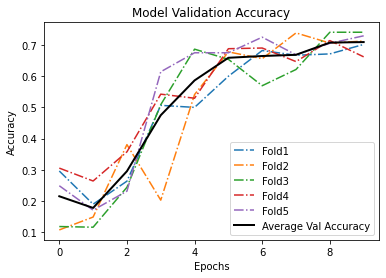

In [28]:
plot_accuracy(history)

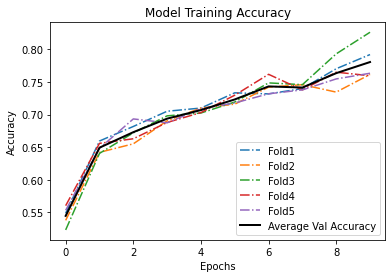

In [29]:
plot_accuracy(history,acc='accuracy')